In [2]:
# Importing the laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ingnore harmless warnings
import warnings
warnings.filterwarnings('ignore')

import pandasql as psql

In [6]:
AutoIns = pd.read_csv(r"D:\iiit notes\Internship\31 season 25th jun-2021\Auto_Quote_Data_V2.0.csv", header= 0)
AutoIns.head()

,Quote_Num,Agent_Type,Q_Creation_DT,Q_Valid_DT,Policy_Bind_DT,Region,Agent_Num,Policy_Type,HH_Vehicles,HH_Drivers,...,Sal_Range1,Sal_Range2,Coverage,Veh_Usage,Annual_Miles_Range,Vehicl_Cost_Range1,Vehicl_Cost_Range2,Re_Quote,Quoted_Premium,Policy_Bind
0,AQ-C-139212,EA,2020/04/25,2020/06/23,2020/05/23,C,2156,Car,3,3,...,> $ 25 K <= $ 40 K,> 25 K <= 40 K,Balanced,Commute,> 55 K,> $ 10 K <= $ 20 K,> 10 K <= 20 K,No,693.86,Yes
1,AQ-F-136117,EA,2020/02/21,2020/04/20,NaN,F,2153,Van,2,2,...,> $ 40 K <= $ 60 K,> 40 K <= 60 K,Balanced,Pleasure,> 7.5 K & <= 15 K,<= $ 10 K,<= 10 K,No,635.96,No
2,AQ-F-126801,EA,2020/06/19,2020/08/17,2020/07/12,F,2056,Truck,2,1,...,> $ 40 K <= $ 60 K,> 40 K <= 60 K,Basic,Commute,> 35 K & <= 45 K,> $ 10 K <= $ 20 K,> 10 K <= 20 K,No,780.64,Yes
3,AQ-E-143467,EA,2020/05/02,2020/06/30,2020/05/24,E,2138,Car,1,2,...,> $ 90 K,> 90 K,Basic,Pleasure,<= 7.5 K,<= $ 10 K,<= 10 K,No,723.15,Yes
4,AQ-C-143827,EA,2020/02/12,2020/04/11,2020/02/25,C,2327,Truck,3,1,...,<= $ 25 K,<= 25 K,Basic,Pleasure,> 35 K & <= 45 K,<= $ 10 K,<= 10 K,No,738.14,Yes


In [7]:
del AutoIns['Sal_Range1']
del AutoIns['Vehicl_Cost_Range1']
AutoIns.head()

,Quote_Num,Agent_Type,Q_Creation_DT,Q_Valid_DT,Policy_Bind_DT,Region,Agent_Num,Policy_Type,HH_Vehicles,HH_Drivers,...,Marital_Status,Education,Sal_Range2,Coverage,Veh_Usage,Annual_Miles_Range,Vehicl_Cost_Range2,Re_Quote,Quoted_Premium,Policy_Bind
0,AQ-C-139212,EA,2020/04/25,2020/06/23,2020/05/23,C,2156,Car,3,3,...,Widow,High School,> 25 K <= 40 K,Balanced,Commute,> 55 K,> 10 K <= 20 K,No,693.86,Yes
1,AQ-F-136117,EA,2020/02/21,2020/04/20,NaN,F,2153,Van,2,2,...,Dirvorced,Ph.D,> 40 K <= 60 K,Balanced,Pleasure,> 7.5 K & <= 15 K,<= 10 K,No,635.96,No
2,AQ-F-126801,EA,2020/06/19,2020/08/17,2020/07/12,F,2056,Truck,2,1,...,Dirvorced,Ph.D,> 40 K <= 60 K,Basic,Commute,> 35 K & <= 45 K,> 10 K <= 20 K,No,780.64,Yes
3,AQ-E-143467,EA,2020/05/02,2020/06/30,2020/05/24,E,2138,Car,1,2,...,Married,Ph.D,> 90 K,Basic,Pleasure,<= 7.5 K,<= 10 K,No,723.15,Yes
4,AQ-C-143827,EA,2020/02/12,2020/04/11,2020/02/25,C,2327,Truck,3,1,...,Widow,High School,<= 25 K,Basic,Pleasure,> 35 K & <= 45 K,<= 10 K,No,738.14,Yes


In [8]:
# Convert the target variable data type into integer

AutoIns['Policy_Bind'] = AutoIns['Policy_Bind'].str.replace('Yes', '1')
AutoIns['Policy_Bind'] = AutoIns['Policy_Bind'].str.replace('No', '0')
AutoIns['Policy_Bind'] = AutoIns['Policy_Bind'].astype(int)

In [9]:
# Count the Target or dependent variable by '0' & '1' and 
# their proportion (> 10:1, then the dataset is imbalance dataset)

Policy_Bind_count = AutoIns.Policy_Bind.value_counts()
print('Class 0:', Policy_Bind_count[0])
print('Class 1:', Policy_Bind_count[1])
print('Proportion:', round(Policy_Bind_count[0] / Policy_Bind_count[1], 2), ': 1')
print('Total Records:', len(AutoIns))

Class 0: 113757
Class 1: 32502
Proportion: 3.5 : 1
Total Records: 146259


In [10]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146259 entries, 0 to 146258
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Quote_Num           146259 non-null  object 
 1   Agent_Type          146259 non-null  object 
 2   Q_Creation_DT       146259 non-null  object 
 3   Q_Valid_DT          146259 non-null  object 
 4   Policy_Bind_DT      32502 non-null   object 
 5   Region              146259 non-null  object 
 6   Agent_Num           146259 non-null  int64  
 7   Policy_Type         146259 non-null  object 
 8   HH_Vehicles         146259 non-null  int64  
 9   HH_Drivers          146259 non-null  int64  
 10  Driver_Age          146259 non-null  int64  
 11  Driving_Exp         146259 non-null  int64  
 12  Prev_Accidents      146259 non-null  int64  
 13  Prev_Citations      146259 non-null  int64  
 14  Gender              146259 non-null  object 
 15  Marital_Status      146259 non-nul

In [11]:
AutoIns = AutoIns.drop(['Quote_Num', 'Q_Creation_DT', 'Q_Valid_DT', 'Policy_Bind_DT', 'Agent_Num'], axis = 1)
AutoIns.head()

,Agent_Type,Region,Policy_Type,HH_Vehicles,HH_Drivers,Driver_Age,Driving_Exp,Prev_Accidents,Prev_Citations,Gender,Marital_Status,Education,Sal_Range2,Coverage,Veh_Usage,Annual_Miles_Range,Vehicl_Cost_Range2,Re_Quote,Quoted_Premium,Policy_Bind
0,EA,C,Car,3,3,43,26,0,0,Female,Widow,High School,> 25 K <= 40 K,Balanced,Commute,> 55 K,> 10 K <= 20 K,No,693.86,1
1,EA,F,Van,2,2,30,13,0,0,Female,Dirvorced,Ph.D,> 40 K <= 60 K,Balanced,Pleasure,> 7.5 K & <= 15 K,<= 10 K,No,635.96,0
2,EA,F,Truck,2,1,25,8,0,0,Female,Dirvorced,Ph.D,> 40 K <= 60 K,Basic,Commute,> 35 K & <= 45 K,> 10 K <= 20 K,No,780.64,1
3,EA,E,Car,1,2,43,26,0,0,Female,Married,Ph.D,> 90 K,Basic,Pleasure,<= 7.5 K,<= 10 K,No,723.15,1
4,EA,C,Truck,3,1,40,23,0,0,Female,Widow,High School,<= 25 K,Basic,Pleasure,> 35 K & <= 45 K,<= 10 K,No,738.14,1


In [12]:
AutoIns['Agent_Type'].value_counts(sort = False)

EA    104004
IA     42255
Name: Agent_Type, dtype: int64

In [13]:
AutoIns['Agent_Type'] = AutoIns['Agent_Type'].str.replace('IA', '1')
AutoIns['Agent_Type'] = AutoIns['Agent_Type'].str.replace('EA', '0')
AutoIns['Agent_Type'] = AutoIns['Agent_Type'].astype(int)

In [14]:
AutoIns['Agent_Type'].value_counts(sort = False)

0    104004
1     42255
Name: Agent_Type, dtype: int64

In [15]:
AutoIns['Region'].value_counts(sort = False)

H    18474
G    18073
C    18137
B    18213
A    18329
F    18320
E    18324
D    18389
Name: Region, dtype: int64

In [16]:
AutoIns['Region'] = AutoIns['Region'].str.replace('A', '1')
AutoIns['Region'] = AutoIns['Region'].str.replace('B', '2')
AutoIns['Region'] = AutoIns['Region'].str.replace('C', '3')
AutoIns['Region'] = AutoIns['Region'].str.replace('D', '4')
AutoIns['Region'] = AutoIns['Region'].str.replace('E', '5')
AutoIns['Region'] = AutoIns['Region'].str.replace('F', '6')
AutoIns['Region'] = AutoIns['Region'].str.replace('G', '7')
AutoIns['Region'] = AutoIns['Region'].str.replace('H', '8')
AutoIns['Region'] = AutoIns['Region'].astype(int)


In [17]:
AutoIns['Region'].value_counts(sort = False)

1    18329
2    18213
3    18137
4    18389
5    18324
6    18320
7    18073
8    18474
Name: Region, dtype: int64

In [18]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146259 entries, 0 to 146258
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Agent_Type          146259 non-null  int32  
 1   Region              146259 non-null  int32  
 2   Policy_Type         146259 non-null  object 
 3   HH_Vehicles         146259 non-null  int64  
 4   HH_Drivers          146259 non-null  int64  
 5   Driver_Age          146259 non-null  int64  
 6   Driving_Exp         146259 non-null  int64  
 7   Prev_Accidents      146259 non-null  int64  
 8   Prev_Citations      146259 non-null  int64  
 9   Gender              146259 non-null  object 
 10  Marital_Status      146259 non-null  object 
 11  Education           146259 non-null  object 
 12  Sal_Range2          146259 non-null  object 
 13  Coverage            146259 non-null  object 
 14  Veh_Usage           146259 non-null  object 
 15  Annual_Miles_Range  146259 non-nul

In [19]:
AutoIns['Gender'].value_counts(sort = False)

Female    73294
Male      72965
Name: Gender, dtype: int64

In [20]:
AutoIns['Gender'] = AutoIns['Gender'].str.replace('Female', '0')
AutoIns['Gender'] = AutoIns['Gender'].str.replace('Male', '1')
AutoIns['Gender'] = AutoIns['Gender'].astype(int)

In [21]:
AutoIns['Gender'].value_counts(sort = False)

0    73294
1    72965
Name: Gender, dtype: int64

In [22]:
AutoIns['Marital_Status'].value_counts(sort = False)

Widow        36523
Dirvorced    36520
Married      36505
Single       36711
Name: Marital_Status, dtype: int64

In [24]:
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].str.replace('Single', '1')
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].str.replace('Dirvorced', '2')
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].str.replace('Widow', '3')
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].str.replace('Married', '4')
AutoIns['Marital_Status'] = AutoIns['Marital_Status'].astype(int)


In [25]:
AutoIns['Marital_Status'].value_counts(sort = False)

1    36711
2    36520
3    36523
4    36505
Name: Marital_Status, dtype: int64

In [26]:
AutoIns['Education'].value_counts(sort = False)

Ph.D           28970
Bachelors      29232
College        29475
High School    29149
Masters        29433
Name: Education, dtype: int64

In [27]:
AutoIns['Education'] = AutoIns['Education'].str.replace('High School', '1')
AutoIns['Education'] = AutoIns['Education'].str.replace('College', '2')
AutoIns['Education'] = AutoIns['Education'].str.replace('Bachelors', '3')
AutoIns['Education'] = AutoIns['Education'].str.replace('Masters', '4')
AutoIns['Education'] = AutoIns['Education'].str.replace('Ph.D', '5')
AutoIns['Education'] = AutoIns['Education'].astype(int)

In [28]:
AutoIns['Education'].value_counts(sort = False)

1    29149
2    29475
3    29232
4    29433
5    28970
Name: Education, dtype: int64

In [30]:
AutoIns['Coverage'].value_counts(sort = False)

Basic       62764
Enhanced    41720
Balanced    41775
Name: Coverage, dtype: int64

In [32]:
AutoIns['Coverage'] = AutoIns['Coverage'].str.replace('Basic', '1')
AutoIns['Coverage'] = AutoIns['Coverage'].str.replace('Balanced', '2')
AutoIns['Coverage'] = AutoIns['Coverage'].str.replace('Enhanced', '3')
AutoIns['Coverage'] = AutoIns['Coverage'].astype(int)

In [33]:
AutoIns['Coverage'].value_counts(sort = False)

1    62764
2    41775
3    41720
Name: Coverage, dtype: int64

In [34]:
AutoIns['Veh_Usage'].value_counts(sort = False)

Business    20834
Pleasure    83504
Commute     41921
Name: Veh_Usage, dtype: int64

In [37]:
AutoIns['Veh_Usage'] = AutoIns['Veh_Usage'].str.replace('Pleasure', '1')
AutoIns['Veh_Usage'] = AutoIns['Veh_Usage'].str.replace('Commute', '2')
AutoIns['Veh_Usage'] = AutoIns['Veh_Usage'].str.replace('Business', '3')
AutoIns['Veh_Usage'] = AutoIns['Veh_Usage'].astype(int)

In [38]:
AutoIns['Veh_Usage'].value_counts(sort = False)

1    83504
2    41921
3    20834
Name: Veh_Usage, dtype: int64

In [39]:
AutoIns['Re_Quote'].value_counts(sort = False)

Yes     36254
No     110005
Name: Re_Quote, dtype: int64

In [40]:
AutoIns['Re_Quote'] = AutoIns['Re_Quote'].str.replace('Yes', '1')
AutoIns['Re_Quote'] = AutoIns['Re_Quote'].str.replace('No', '0')
AutoIns['Re_Quote'] = AutoIns['Re_Quote'].astype(int)


In [41]:
AutoIns['Re_Quote'].value_counts(sort = False)

0    110005
1     36254
Name: Re_Quote, dtype: int64

In [42]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146259 entries, 0 to 146258
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Agent_Type          146259 non-null  int32  
 1   Region              146259 non-null  int32  
 2   Policy_Type         146259 non-null  object 
 3   HH_Vehicles         146259 non-null  int64  
 4   HH_Drivers          146259 non-null  int64  
 5   Driver_Age          146259 non-null  int64  
 6   Driving_Exp         146259 non-null  int64  
 7   Prev_Accidents      146259 non-null  int64  
 8   Prev_Citations      146259 non-null  int64  
 9   Gender              146259 non-null  int32  
 10  Marital_Status      146259 non-null  int32  
 11  Education           146259 non-null  int32  
 12  Sal_Range2          146259 non-null  object 
 13  Coverage            146259 non-null  int32  
 14  Veh_Usage           146259 non-null  int32  
 15  Annual_Miles_Range  146259 non-nul

In [43]:
AutoIns.columns

Index(['Agent_Type', 'Region', 'Policy_Type', 'HH_Vehicles', 'HH_Drivers',
       'Driver_Age', 'Driving_Exp', 'Prev_Accidents', 'Prev_Citations',
       'Gender', 'Marital_Status', 'Education', 'Sal_Range2', 'Coverage',
       'Veh_Usage', 'Annual_Miles_Range', 'Vehicl_Cost_Range2', 'Re_Quote',
       'Quoted_Premium', 'Policy_Bind'],
      dtype='object')

In [44]:
AutoIns.shape

(146259, 20)

In [45]:
AutoIns = pd.get_dummies(AutoIns, columns ={'Sal_Range2', 'Annual_Miles_Range', 'Vehicl_Cost_Range2'})
AutoIns.head().T

,0,1,2,3,4
Agent_Type,0,0,0,0,0
Region,3,6,6,5,3
Policy_Type,Car,Van,Truck,Car,Truck
HH_Vehicles,3,2,2,1,3
HH_Drivers,3,2,1,2,1
Driver_Age,43,30,25,43,40
Driving_Exp,26,13,8,26,23
Prev_Accidents,0,0,0,0,0
Prev_Citations,0,0,0,0,0
Gender,0,0,0,0,0


In [46]:
AutoIns.shape

(146259, 34)

In [47]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146259 entries, 0 to 146258
Data columns (total 34 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Agent_Type                            146259 non-null  int32  
 1   Region                                146259 non-null  int32  
 2   Policy_Type                           146259 non-null  object 
 3   HH_Vehicles                           146259 non-null  int64  
 4   HH_Drivers                            146259 non-null  int64  
 5   Driver_Age                            146259 non-null  int64  
 6   Driving_Exp                           146259 non-null  int64  
 7   Prev_Accidents                        146259 non-null  int64  
 8   Prev_Citations                        146259 non-null  int64  
 9   Gender                                146259 non-null  int32  
 10  Marital_Status                        146259 non-null  int32  
 11  

In [48]:
AutoIns['Policy_Type'] = AutoIns['Policy_Type'].str.replace('Car', '1')
AutoIns['Policy_Type'] = AutoIns['Policy_Type'].str.replace('Van', '2')
AutoIns['Policy_Type'] = AutoIns['Policy_Type'].str.replace('Truck', '3')
AutoIns['Policy_Type'] = AutoIns['Policy_Type'].astype(int)

In [49]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146259 entries, 0 to 146258
Data columns (total 34 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Agent_Type                            146259 non-null  int32  
 1   Region                                146259 non-null  int32  
 2   Policy_Type                           146259 non-null  int32  
 3   HH_Vehicles                           146259 non-null  int64  
 4   HH_Drivers                            146259 non-null  int64  
 5   Driver_Age                            146259 non-null  int64  
 6   Driving_Exp                           146259 non-null  int64  
 7   Prev_Accidents                        146259 non-null  int64  
 8   Prev_Citations                        146259 non-null  int64  
 9   Gender                                146259 non-null  int32  
 10  Marital_Status                        146259 non-null  int32  
 11  

In [50]:
# Identify the dependent and Target variable

IndepVar = []

for col in AutoIns.columns:
    if col != 'Policy_Bind':
        IndepVar.append(col)
        
TargetVar = 'Policy_Bind'

x = AutoIns[IndepVar]
y = AutoIns[TargetVar]

In [51]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [52]:
# Random undersampling to balance the class distribution

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy = 'majority')
x_under, y_under = undersample.fit_resample(x, y)
print(x_under.shape)
print(y_under.shape)

(65004, 33)
(65004,)


In [54]:
# To build the decision tree model with random sampling

from sklearn.tree import DecisionTreeClassifier

AutoInsDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                                   max_depth=None, max_features=None, max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_impurity_split=None,
                                   min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                   random_state=None, splitter='best')
AutoInsDT = AutoInsDT.fit(x_train, y_train)

In [55]:
# Predict the model with test data set

y_pred = AutoInsDT.predict(x_test)

In [56]:
# Evaluate the model performace by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print('Accuracy:', (round(metrics.accuracy_score(y_test, y_pred)* 100, 2)), '%')

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y_pred)* 100 , 2)), '%')

# Model Precision: what percentage of positive tuples are labeled as such?
print("Recall:", (round(metrics.recall_score(y_test, y_pred) * 100 , 2)), '%')

# Model f1-score
print("f1-score:", (round(metrics.f1_score(y_test, y_pred) * 100, 2)), '%') 

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Accuracy: 64.26 %
Precision: 22.4 %
Recall: 24.25 %
f1-score: 23.29 %
roc_auc_score: 0.5


Feature: 0, Score: 0.02253
Feature: 1, Score: 0.07462
Feature: 2, Score: 0.03812
Feature: 3, Score: 0.03920
Feature: 4, Score: 0.03595
Feature: 5, Score: 0.06670
Feature: 6, Score: 0.06325
Feature: 7, Score: 0.01348
Feature: 8, Score: 0.00010
Feature: 9, Score: 0.01538
Feature: 10, Score: 0.04562
Feature: 11, Score: 0.05770
Feature: 12, Score: 0.02894
Feature: 13, Score: 0.03240
Feature: 14, Score: 0.01930
Feature: 15, Score: 0.25025
Feature: 16, Score: 0.01333
Feature: 17, Score: 0.01349
Feature: 18, Score: 0.01092
Feature: 19, Score: 0.01001
Feature: 20, Score: 0.01018
Feature: 21, Score: 0.01525
Feature: 22, Score: 0.01418
Feature: 23, Score: 0.01215
Feature: 24, Score: 0.01146
Feature: 25, Score: 0.01229
Feature: 26, Score: 0.01428
Feature: 27, Score: 0.01370
Feature: 28, Score: 0.00169
Feature: 29, Score: 0.01050
Feature: 30, Score: 0.01018
Feature: 31, Score: 0.00969
Feature: 32, Score: 0.01317


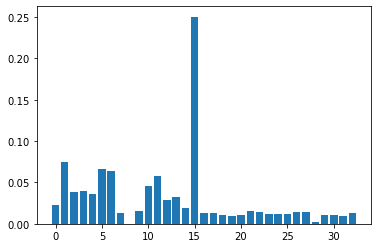

In [59]:
# Get feature (indempendent variables) importance

from matplotlib import pyplot

importance = AutoInsDT.feature_importances_

# summarize feature importance

for i,j in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,j))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# The positive scores indicate a feature that predicts class 1,
# whereas the negative scores indicate a feature that predicts class 0

In [60]:
AutoIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146259 entries, 0 to 146258
Data columns (total 34 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Agent_Type                            146259 non-null  int32  
 1   Region                                146259 non-null  int32  
 2   Policy_Type                           146259 non-null  int32  
 3   HH_Vehicles                           146259 non-null  int64  
 4   HH_Drivers                            146259 non-null  int64  
 5   Driver_Age                            146259 non-null  int64  
 6   Driving_Exp                           146259 non-null  int64  
 7   Prev_Accidents                        146259 non-null  int64  
 8   Prev_Citations                        146259 non-null  int64  
 9   Gender                                146259 non-null  int32  
 10  Marital_Status                        146259 non-null  int32  
 11  